<a href="https://colab.research.google.com/github/krushalshah/AI-ML-Internship/blob/main/Test_My_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Packeges
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from sklearn.preprocessing import MinMaxScaler
#LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 16,6

In [ ]:
rcParams['figure.figsize'] = 16,6

In [ ]:
### Data Collection
key="20eb03f1bb408d3c17789f5586d5f4105c80b995"

In [ ]:
df = pdr.get_data_tiingo('MSFT', api_key=key)

In [ ]:
df.to_csv('MSFT.csv')

In [ ]:
df=pd.read_csv('MSFT.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,MSFT,2016-08-15 00:00:00+00:00,58.12,58.50,57.96,58.01,19283902,53.548534,53.898645,53.401119,53.447186,19283902,0.00,1.0
1,MSFT,2016-08-16 00:00:00+00:00,57.44,57.62,57.27,57.61,20523493,53.253704,53.420585,53.096094,53.411314,20523493,0.36,1.0
2,MSFT,2016-08-17 00:00:00+00:00,57.56,57.68,57.23,57.54,18856423,53.364958,53.476213,53.059009,53.346416,18856423,0.00,1.0
3,MSFT,2016-08-18 00:00:00+00:00,57.60,57.70,57.27,57.42,14214341,53.402043,53.494755,53.096094,53.235162,14214341,0.00,1.0
4,MSFT,2016-08-19 00:00:00+00:00,57.62,57.73,57.20,57.43,17271044,53.420585,53.522569,53.031196,53.244433,17271044,0.00,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,MSFT,2021-08-05 00:00:00+00:00,289.52,289.63,286.1000,286.880,13900167,289.52,289.63,286.1000,286.880,13900167,0.0,1.0
1253,MSFT,2021-08-06 00:00:00+00:00,289.46,289.50,287.6238,288.505,16589336,289.46,289.50,287.6238,288.505,16589336,0.0,1.0
1254,MSFT,2021-08-09 00:00:00+00:00,288.33,291.55,287.8100,289.750,16117629,288.33,291.55,287.8100,289.750,16117629,0.0,1.0
1255,MSFT,2021-08-10 00:00:00+00:00,286.44,289.25,285.2000,288.800,18616578,286.44,289.25,285.2000,288.800,18616578,0.0,1.0
1256,MSFT,2021-08-11 00:00:00+00:00,286.95,288.66,285.8600,287.210,13955934,286.95,288.66,285.8600,287.210,13955934,0.0,1.0


In [ ]:
df1=df.reset_index()['close']

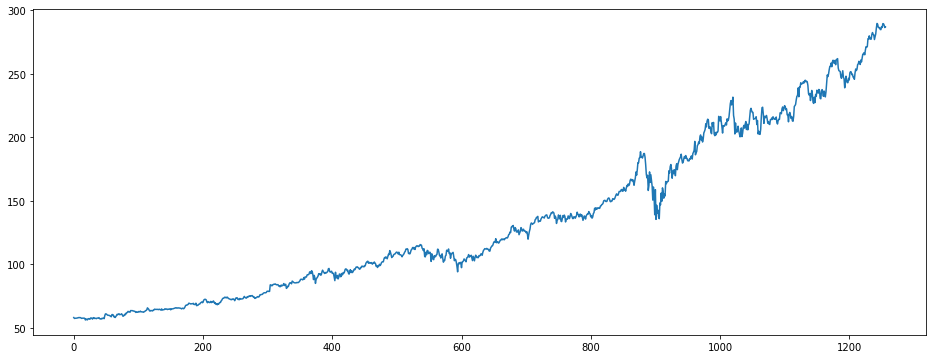

In [ ]:
plt.plot(df1);

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(817, 440)

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
import numpy
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1);

Epoch 1/100
12/12 [==============================] - 9s 297ms/step - loss: 0.0128 - val_loss: 0.1153
Epoch 2/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0030 - val_loss: 0.0070
Epoch 3/100
12/12 [==============================] - 2s 200ms/step - loss: 7.6091e-04 - val_loss: 0.0016
Epoch 4/100
12/12 [==============================] - 2s 198ms/step - loss: 3.0217e-04 - val_loss: 0.0018
Epoch 5/100
12/12 [==============================] - 2s 200ms/step - loss: 1.8171e-04 - val_loss: 0.0064
Epoch 6/100
12/12 [==============================] - 2s 191ms/step - loss: 1.7270e-04 - val_loss: 0.0048
Epoch 7/100
12/12 [==============================] - 2s 192ms/step - loss: 1.7257e-04 - val_loss: 0.0034
Epoch 8/100
12/12 [==============================] - 2s 197ms/step - loss: 1.5048e-04 - val_loss: 0.0046
Epoch 9/100
12/12 [==============================] - 2s 192ms/step - loss: 1.4748e-04 - val_loss: 0.0041
Epoch 10/100
12/12 [==============================] - 2s 192ms/

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train,train_predict))

102.54193162251264

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

220.90191631389803

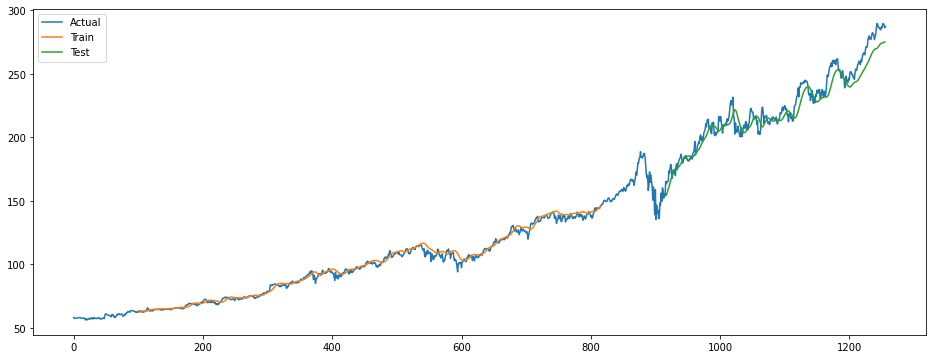

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label = 'Actual')
plt.plot(trainPredictPlot,label = 'Train')
plt.plot(testPredictPlot, label ='Test')
plt.legend();
plt.show();


In [ ]:
len(test_data)

440

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 99)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
lst_output=[]
n_steps=99
i=0
while(i<30):
    
    if(len(temp_input)>99):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.9387156]
100
1 day input [0.76779748 0.75443331 0.77216654 0.76685514 0.75233445 0.76912533
 0.79731003 0.82609441 0.82091151 0.82964962 0.84399897 0.85513578
 0.85539279 0.86644393 0.8540221  0.87077015 0.87608156 0.86751478
 0.86545875 0.87539621 0.86078986 0.87783775 0.8795511  0.88135012
 0.84961021 0.84082926 0.83941575 0.83804506 0.82061167 0.81495759
 0.82892144 0.84061509 0.8179988  0.81392958 0.78296068 0.80022274
 0.82215369 0.80943202 0.80043691 0.80060824 0.81500043 0.80938919
 0.833419   0.83744539 0.83646021 0.82712242 0.82870727 0.81894115
 0.81851281 0.81170222 0.83346184 0.84639767 0.84108627 0.84545532
 0.86108969 0.8638739  0.87244068 0.86588709 0.86168937 0.8767669
 0.87047032 0.88417716 0.89651332 0.89550672 0.90156772 0.89441446
 0.910263   0.92174248 0.91960079 0.92259916 0.94851366 0.9485565
 0.95827979 0.94752848 0.94975585 0.94710015 0.96277735 0.96933093
 0.96299152 0.96179217 0.9457723  0.95566692 0.96457637 0.98487964
 1.         0.9973443  0.98659299 0.

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

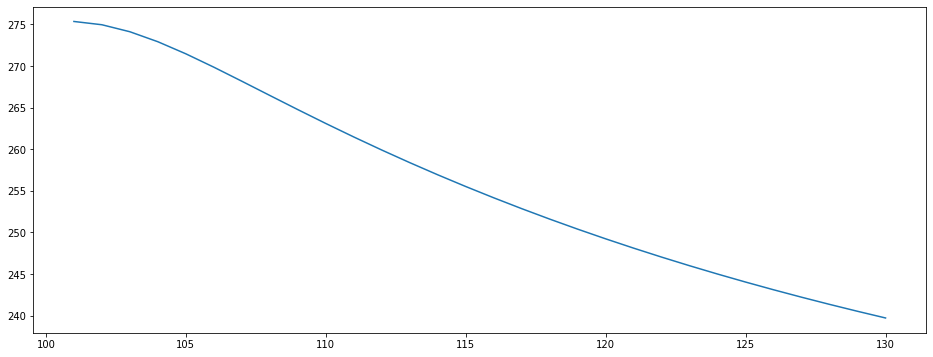

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]));
plt.plot(day_pred,scaler.inverse_transform(lst_output));

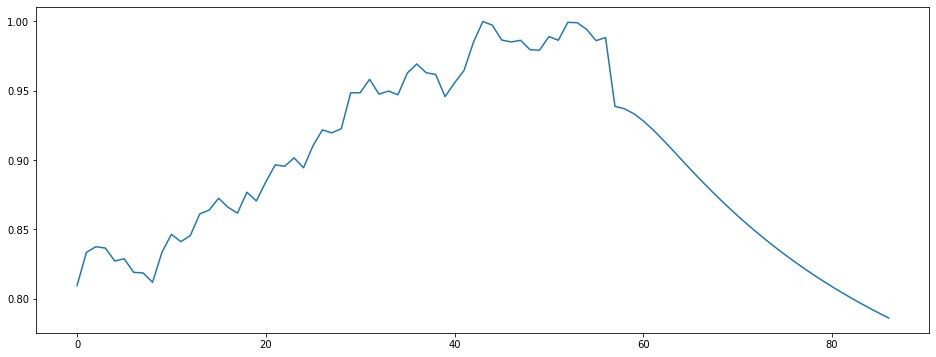

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:]);

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

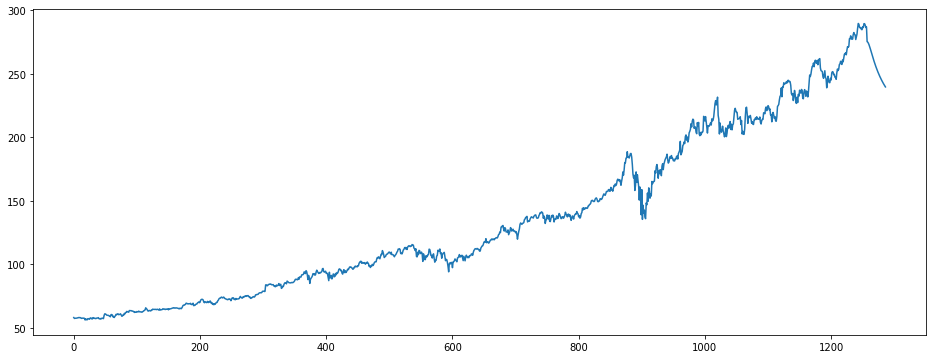

In [ ]:
plt.plot(df3);

Reference Video Link: https://www.youtube.com/watch?v=H6du_pfuznE&t=260s